# Objective
The goal of Milestone 3 is to generate code to randomly remove some data to replicate incomplete data, and then determine the accuracy of the coding to determine the opening move with missing data. This code begins by randomly generating the data removed and then 

*Jennifer will add more detail. 

# Step 1: Import Libraries and Setup

This section imports the necessary libraries for data manipulation and visualisation. 

The sys library is used to modify the system path to include the directory where the ChessOpeningMapper module is located.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import zipfile
import os
import numpy as np
import random
from sklearn.model_selection import train_test_split

# Add the path to the directory where ChessOpeningMapper.py is located. I had issues with the path, 
# so I went with the relative path. This will have to change.
sys.path.append(r'Sprint 2')

# Import ChessOpeningMapper
from ChessOpeningMapper import ChessOpeningMapper



# Step 2: Load Opening Moves and Create Trie Structure.
# 
In this step, an instance of ChessOpeningMapper is created.

A list of file paths to the TSV files containing chess openings is defined.

These TSV files are merged into a single DataFrame using merge_tsv_files.

The PGN strings are split into individual moves using split_pgn_to_columns.

A Trie structure is created from the opening moves using create_trie.

In [2]:
# Create an instance of ChessOpeningMapper
mapper = ChessOpeningMapper()

# Define a list of file paths to the TSV files containing chess openings, I had issues with the path, so I have mapped them manually. 
file_list = [
    r'Chess Pattern Recognition\a.tsv',
    r'Chess Pattern Recognition\b.tsv',
    r'Chess Pattern Recognition\c.tsv',
    r'Chess Pattern Recognition\d.tsv',
    r'Chess Pattern Recognition\e.tsv'
]

# Merge the TSV files into a single DataFrame
opening_moves = mapper.merge_tsv_files(file_list)

# Split the PGN strings into individual moves
opening_moves = mapper.split_pgn_to_columns(opening_moves)

# Create a Trie structure from the opening moves
mapper.create_trie(opening_moves)

# Display the first few rows of the opening moves DataFrame
print("Opening Moves DataFrame:")
print(opening_moves.head())

Opening Moves DataFrame:
   eco                                     name  \
0  A00                             Amar Opening   
1  A00               Amar Opening: Paris Gambit   
2  A00  Amar Opening: Paris Gambit, Gent Gambit   
3  A00                         Amsterdam Attack   
4  A00                      Anderssen's Opening   

                                                 pgn Move_ply_1 Move_ply_2  \
0                                             1. Nh3        Nh3       None   
1                           1. Nh3 d5 2. g3 e5 3. f4        Nh3         d5   
2  1. Nh3 d5 2. g3 e5 3. f4 Bxh3 4. Bxh3 exf4 5. ...        Nh3         d5   
3             1. e3 e5 2. c4 d6 3. Nc3 Nc6 4. b3 Nf6         e3         e5   
4                                              1. a3         a3       None   

  Move_ply_3 Move_ply_4 Move_ply_5 Move_ply_6 Move_ply_7  ... Move_ply_28  \
0       None       None       None       None       None  ...        None   
1         g3         e5         f4       None

# Step 3: Unzip and Load Chess Game Data
This step involves:

Defining the path to the zipped game data file.

Unzipping the game data file to extract the CSV file.

Loading the extracted CSV file into a DataFrame.

In [3]:
# Define the path to the zipped game data file
game_data_zip_path = r'Chess Pattern Recognition\chessdata.zip'

# Define the name of the extracted CSV file
extracted_file_name = 'chessdata.csv'

# Unzip the game data file
ChessOpeningMapper.unzip_game_data(zip_path=game_data_zip_path, extract_to='.')

# Load the extracted CSV file into a DataFrame
game_data = ChessOpeningMapper.load_game_data(zip_path=game_data_zip_path, extracted_file_name=extracted_file_name)

# Display the first few rows of the game data DataFrame
print("Game Data DataFrame:")
print(game_data.head())


c:\Users\jenni\Desktop\jn\uni\capstone 1\Sprint 2\ChessOpeningMapper.py:104: DtypeWarning: Columns (188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408) have mixed types. Specify dtype option on import or set low_memory=False.
  game_data = pd.read_csv(extracted_file_name)


Game Data DataFrame:
   Index        Date  ECO                                 Opening Result  \
0      0  2019.04.30  B15                       Caro-Kann Defense    0-1   
1      1  2019.04.30  C50                            Italian Game    0-1   
2      2  2019.04.30  C41                     Philidor Defense #2    1-0   
3      3  2019.04.30  B06                          Modern Defense    0-1   
4      4  2019.04.30  B32  Sicilian Defense: Loewenthal Variation    1-0   

  Termination TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_192  \
0      Normal       300+3  2019.04.30  22:00:24         d4  ...           NaN   
1      Normal       300+0  2019.04.30  22:00:13         e4  ...           NaN   
2      Normal       600+0  2019.04.30  22:00:41         e4  ...           NaN   
3      Normal        60+0  2019.04.30  22:00:43         e4  ...           NaN   
4      Normal       180+0  2019.04.30  22:00:46         e4  ...           NaN   

  Clock_ply_193 Clock_ply_194 Clock

# Step 4: Map Opening Names to Game Data

Here:

The game data is processed to map the move sequences to opening names using get_opening_name_from_game.

The mapped opening names are added to the original game data DataFrame in a new column called mapped_opening.


In [4]:
# Map the opening names to the game data
result_df = mapper.get_opening_name_from_game(game_data)

# Add the mapped opening names to the original game data DataFrame
game_data['mapped_opening'] = result_df['opening_name']

# Display the first 5 rows of the updated game data DataFrame
print(f"First 5 rows with mapped openings: \n{game_data.head()}")

First 5 rows with mapped openings: 
   Index        Date  ECO                                 Opening Result  \
0      0  2019.04.30  B15                       Caro-Kann Defense    0-1   
1      1  2019.04.30  C50                            Italian Game    0-1   
2      2  2019.04.30  C41                     Philidor Defense #2    1-0   
3      3  2019.04.30  B06                          Modern Defense    0-1   
4      4  2019.04.30  B32  Sicilian Defense: Loewenthal Variation    1-0   

  Termination TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_193  \
0      Normal       300+3  2019.04.30  22:00:24         d4  ...           NaN   
1      Normal       300+0  2019.04.30  22:00:13         e4  ...           NaN   
2      Normal       600+0  2019.04.30  22:00:41         e4  ...           NaN   
3      Normal        60+0  2019.04.30  22:00:43         e4  ...           NaN   
4      Normal       180+0  2019.04.30  22:00:46         e4  ...           NaN   

  Clock_ply_194 Cloc

# Step 5: Generate Random Code

Here:

- Define the number of loss values
- Randomly select a number of variables depending on the loss values 
- Rename the random values as move_ply_xx and then drop 


In [5]:
# setting loss rows to 1, 2, 3 etc
loss = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]
index = 0

# select a number of variables based on the number of rows lossed, 
# between 0 and 36 to determine which rows to randomly drop
#### Note- 36 was determined as the longest opening move in the dataset
while index < len(loss):
    globals()['loss%s' % loss[index]] = random.sample(range(1, 36), loss[index])
    index += 1

# test example of the loss 3 rows to remove
print(loss3)


[7, 10, 8]


In [6]:
# set loop to make selected values from above to None 
drop_columns3 = {f'Move_ply_{i}' for i in loss3}
game_data3 = game_data
for i in drop_columns3:
    game_data3[i] = None

# test sample for 3 rows loss 
print(game_data3)

         Index        Date  ECO  \
0            0  2019.04.30  B15   
1            1  2019.04.30  C50   
2            2  2019.04.30  C41   
3            3  2019.04.30  B06   
4            4  2019.04.30  B32   
...        ...         ...  ...   
199995  199995  2019.05.22  B00   
199996  199996  2019.05.22  C21   
199997  199997  2019.05.22  D20   
199998  199998  2019.05.22  B07   
199999  199999  2019.05.22  A40   

                                                  Opening Result  \
0                                       Caro-Kann Defense    0-1   
1                                            Italian Game    0-1   
2                                     Philidor Defense #2    1-0   
3                                          Modern Defense    0-1   
4                  Sicilian Defense: Loewenthal Variation    1-0   
...                                                   ...    ...   
199995  Nimzowitsch Defense: Kennedy Variation, Linkss...    0-1   
199996                     King's P

# Step 6: Prepare Data for Testing

In this step, game data is processed to create sequences from non-null moves, preparing it for pattern recognition testing. This step ensures each game's moves are consolidated into a format suitable for analysis.

In [7]:
# Prepare data by creating move sequences from non-null moves
def prepare_game_data_for_testing(game_data, max_plies=200):
    
    """
    Prepare the game data by creating move sequences from non-null moves.
    
    Args:
    - game_data (pd.DataFrame): The DataFrame with chess moves.
    - max_plies (int): The maximum number of plies to consider (default is 200).
    
    Returns:
    - pd.DataFrame: A DataFrame with a new column 'move_sequence' containing sequences of moves.
    """

    move_columns = [f'Move_ply_{i+1}' for i in range(max_plies)]
    selected_moves_df = game_data[move_columns].copy()

    def create_move_sequence(row):
        moves = row.dropna().tolist()  # Drop NaN values and convert to list
        return ' '.join(moves)

    selected_moves_df['move_sequence'] = selected_moves_df.apply(create_move_sequence, axis=1)
    selected_moves_df['mapped_opening'] = game_data['mapped_opening']  # Ensure this column exists
    return selected_moves_df

# Prepare the incomplete game data for testing
processed_game_data3 = prepare_game_data_for_testing(game_data3)

# Debug: Check move sequences
print("Processed game data (with move sequences):\n", processed_game_data3.head())

Processed game data (with move sequences):
   Move_ply_1 Move_ply_2 Move_ply_3 Move_ply_4 Move_ply_5 Move_ply_6  \
0         d4         d5        Nc3         c6         e4         h5   
1         e4         e5        Nf3        Nc6        Bc4         d6   
2         e4         e5        Nf3         d6         c3        Be7   
3         e4         g6         d4         h6        Nc3        Bg7   
4         e4         c5        Nf3        Nc6         d4       cxd4   

  Move_ply_7 Move_ply_8 Move_ply_9 Move_ply_10  ... Move_ply_193 Move_ply_194  \
0       None       None        Qf3        None  ...          NaN          NaN   
1       None       None         d4        None  ...          NaN          NaN   
2       None       None       cxd4        None  ...          NaN          NaN   
3       None       None         f3        None  ...          NaN          NaN   
4       None       None        Nb5        None  ...          NaN          NaN   

  Move_ply_195 Move_ply_196 Move_ply_197 M

# Step 7: Test Pattern Recognition on Incomplete Data

In this step, the ChessOpeningMapper is used to predict chess openings from the processed, incomplete data. The predicted openings are then compared with the actual mapped openings to determine the accuracy of the model, assessing its ability to handle missing data.

In [9]:
# Test pattern recognition on incomplete data
def test_pattern_recognition_on_incomplete_data(mapper, incomplete_df):
    
    """
    Test the pattern recognition on incomplete data using ChessOpeningMapper.
    
    Args:
    - mapper (ChessOpeningMapper): The ChessOpeningMapper instance for mapping openings.
    - incomplete_df (pd.DataFrame): The DataFrame containing incomplete chess move data.
    
    Returns:
    - pd.DataFrame: A DataFrame with the original and predicted openings for comparison.
    """

    # Use the mapper to predict openings based on incomplete data
    incomplete_results = mapper.get_opening_name_from_game(incomplete_df)
    incomplete_df['predicted_opening'] = incomplete_results['opening_name']
    
    if 'mapped_opening' in incomplete_df.columns:
        incomplete_df['match'] = incomplete_df['mapped_opening'] == incomplete_df['predicted_opening']
        accuracy = incomplete_df['match'].mean()
        print(f'Accuracy on incomplete data: {accuracy:.2%}')
    else:
        print("No 'mapped_opening' column found in input data")
    
    return incomplete_df

# Instantiate ChessOpeningMapper and load trie
mapper = ChessOpeningMapper()
opening_moves = mapper.load_openings()
mapper.create_trie(opening_moves)

# Run the test
result_df = test_pattern_recognition_on_incomplete_data(mapper, processed_game_data3)

# Ensure columns exist before printing
if 'mapped_opening' in result_df.columns and 'match' in result_df.columns:
    print(result_df[['mapped_opening', 'predicted_opening', 'match']].head())
else:
    print("Mapped or Match columns not found in the result DataFrame")

Accuracy on incomplete data: 86.72%
                          mapped_opening  \
0  Queen's Pawn Game: Chigorin Variation   
1            Italian Game: Paris Defense   
2                       Philidor Defense   
3                         Modern Defense   
4  Sicilian Defense: Löwenthal Variation   

                       predicted_opening  match  
0  Queen's Pawn Game: Chigorin Variation   True  
1            Italian Game: Paris Defense   True  
2                       Philidor Defense   True  
3                         Modern Defense   True  
4                 Sicilian Defense: Open  False  


# Step 8: Visualise Pattern Recognition Results

In this step, the accuracy of pattern recognition on incomplete data is visualised. A count plot is generated to show the distribution of matches and mismatches between the predicted and actual chess openings, providing insight into the model's performance.

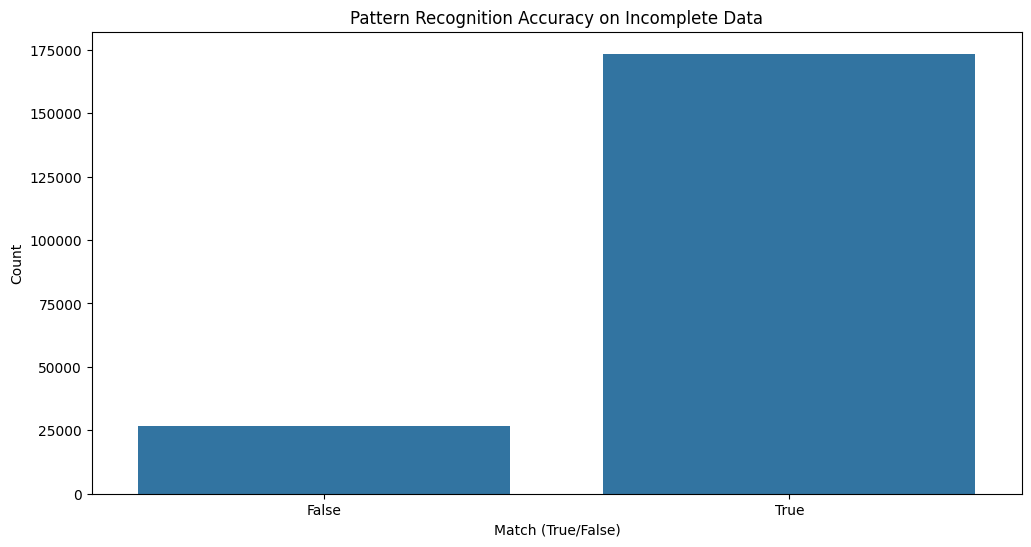

In [10]:
# Step: Visualise results if needed
def visualise_pattern_recognition_results(df):
    
    """
    Visualise the results of pattern recognition on incomplete data.
    
    Args:
    - df (pd.DataFrame): The DataFrame with columns 'mapped_opening', 'predicted_opening', and 'match'.
    """

    if 'match' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(x='match', data=df)
        plt.title('Pattern Recognition Accuracy on Incomplete Data')
        plt.xlabel('Match (True/False)')
        plt.ylabel('Count')
        plt.show()
    else:
        print("No 'match' column available to visualize results.")

# Visualise the pattern recognition results if possible
visualise_pattern_recognition_results(result_df)